In [1]:
import os, sys, time, resource, re, gc, shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import django
sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()
from django.db.models import Q, F, Sum, Count, FloatField, Case, When, Value, Max
import matplotlib.patches as patches
from matplotlib import dates
from scipy.sparse import csr_matrix, find

from scoping.models import *
from tmv_app.models import *

p = Project.objects.get(pk=27)

dos = DocOwnership.objects.filter(tag__query__project=p,finish__isnull=False)

dos

<QuerySet [<DocOwnership: DocOwnership object (62866)>, <DocOwnership: DocOwnership object (62865)>, <DocOwnership: DocOwnership object (62864)>, <DocOwnership: DocOwnership object (62863)>, <DocOwnership: DocOwnership object (62862)>, <DocOwnership: DocOwnership object (62861)>, <DocOwnership: DocOwnership object (62860)>, <DocOwnership: DocOwnership object (62859)>, <DocOwnership: DocOwnership object (62858)>, <DocOwnership: DocOwnership object (62857)>, <DocOwnership: DocOwnership object (62856)>, <DocOwnership: DocOwnership object (62855)>, <DocOwnership: DocOwnership object (62854)>, <DocOwnership: DocOwnership object (62853)>, <DocOwnership: DocOwnership object (62852)>, <DocOwnership: DocOwnership object (62851)>, <DocOwnership: DocOwnership object (62850)>, <DocOwnership: DocOwnership object (62849)>, <DocOwnership: DocOwnership object (62848)>, <DocOwnership: DocOwnership object (62847)>, '...(remaining elements truncated)...']>

In [2]:
dodf = pd.DataFrame.from_dict(list(dos.values(
    'user__username','start','finish','docpar__text_length',
    'relevant'
)))



dodf['seconds'] = (dodf['finish']-dodf['start']).dt.total_seconds()

dodf = dodf[(dodf['seconds'] >0) & (dodf['seconds'] < 600)]

dodf.head()



,docpar__text_length,finish,relevant,start,user__username,seconds
0,55.0,2018-06-28 08:18:08.563888+00:00,2,2018-06-28 08:17:35.758094+00:00,hilj,32.805794
1,322.0,2018-06-28 08:17:35.611556+00:00,1,2018-06-28 08:11:06.369850+00:00,hilj,389.241706
2,55.0,2018-06-25 21:09:00.501924+00:00,2,2018-06-25 21:08:44.313836+00:00,hilj,16.188088
3,55.0,2018-06-25 21:08:44.197134+00:00,2,2018-06-25 21:08:32.866511+00:00,hilj,11.330623
4,4493.0,2018-06-25 21:08:32.702805+00:00,2,2018-06-25 21:08:12.642396+00:00,hilj,20.060409


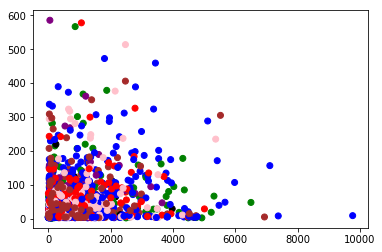

In [3]:
fig, ax = plt.subplots()
colours = {'hilj':'blue',
           'minj':'red',
           'galm':'green',
           'rogj':'purple',
           'delm':'brown',
           'nemet':'pink',
           'ludg': 'black'
          }

ax.scatter(
    dodf['docpar__text_length'],
    dodf['seconds'],
    c=dodf['user__username'].apply(lambda x: colours[x])
)

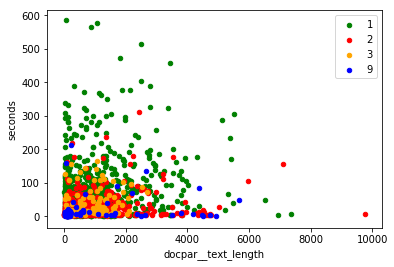

In [4]:
fig, ax = plt.subplots()

colors = ['green','red','orange','blue']
i=0
for key, group in dodf.groupby('relevant'):
    p = group.plot(
        x='docpar__text_length',
        y='seconds',
        ax=ax,
        kind='scatter',
        label=key,
        c=colors[i]
    )
    i+=1
    
plt.show()

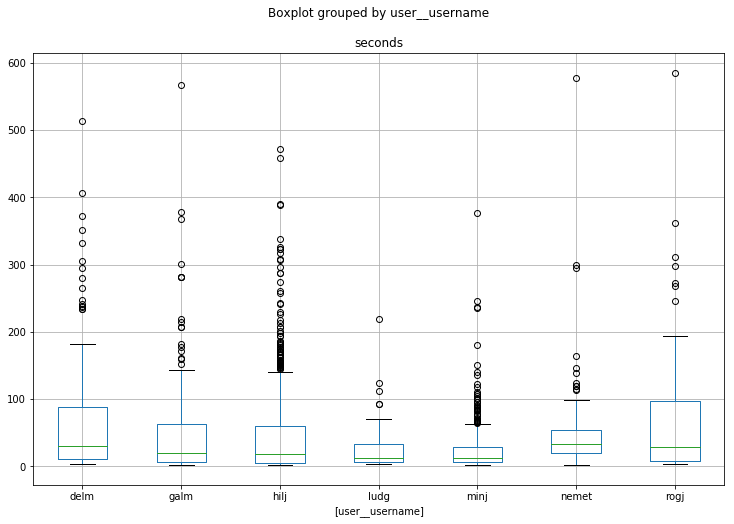

In [4]:
plt.rcParams["figure.figsize"] = (12,8)

dodf.boxplot(
    column="seconds",
    by=["user__username"]
)

plt.show()

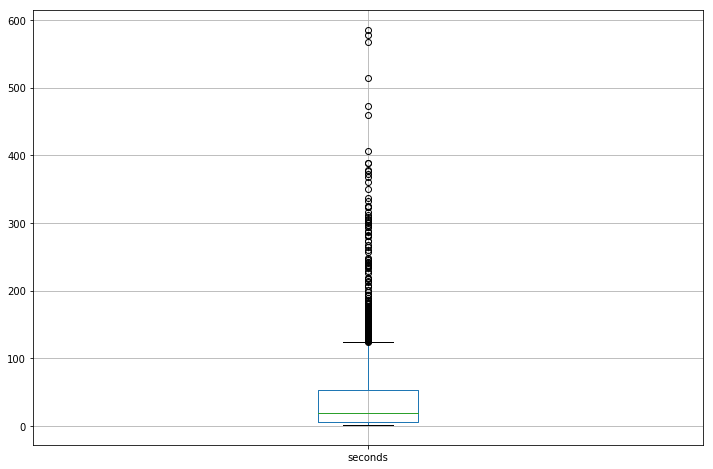

In [5]:
plt.rcParams["figure.figsize"] = (12,8)

dodf.boxplot(
    column="seconds",
)

plt.show()

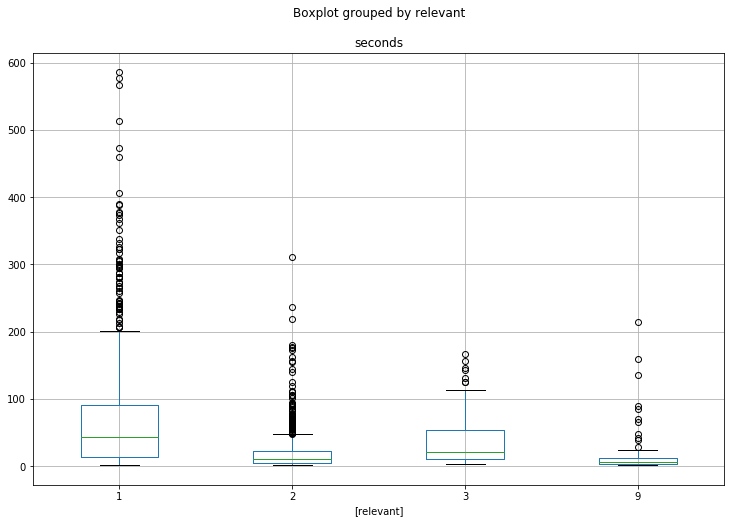

In [6]:
plt.rcParams["figure.figsize"] = (12,8)

dodf.boxplot(
    column="seconds",
    by=["relevant"]
)

plt.show()

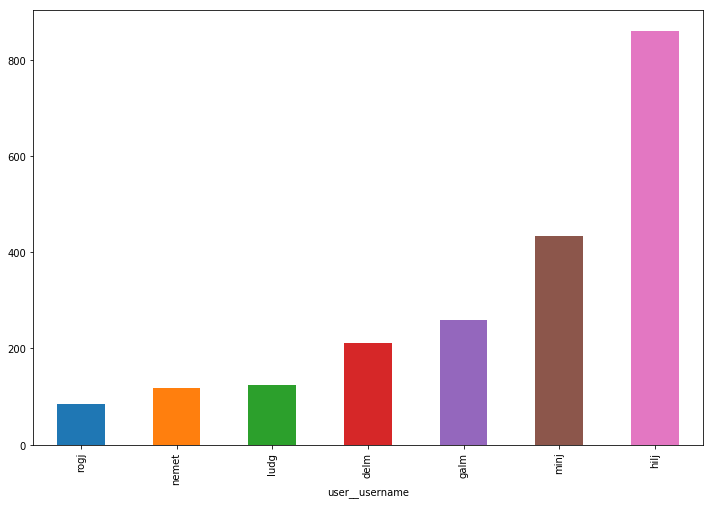

In [7]:
dodf.groupby('user__username').count()['seconds'].sort_values().plot.bar()
#plt.show()

dodf['startnum'] = [dates.date2num(x) for x in dodf['start']]

(736870.8678833189, 736880.4983473517)

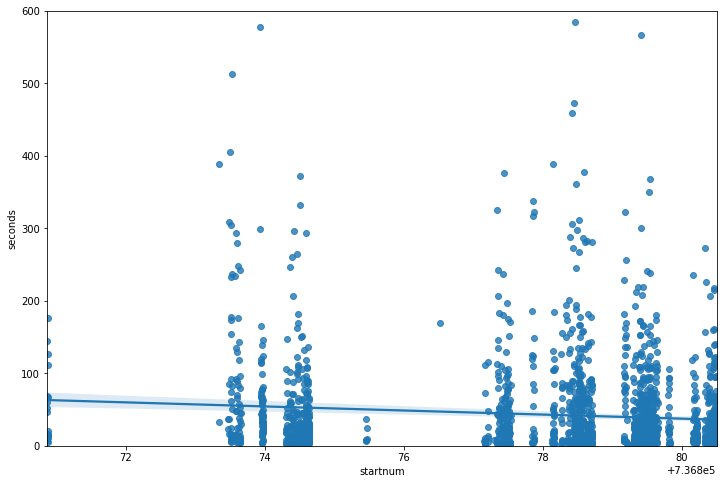

In [8]:
import seaborn as sns

sns.regplot(x='startnum',y='seconds',data=dodf)
plt.ylim((0,600))
plt.xlim(dodf['startnum'].min(),dodf['startnum'].max())

delm
galm
hilj
ludg
minj
nemet
rogj


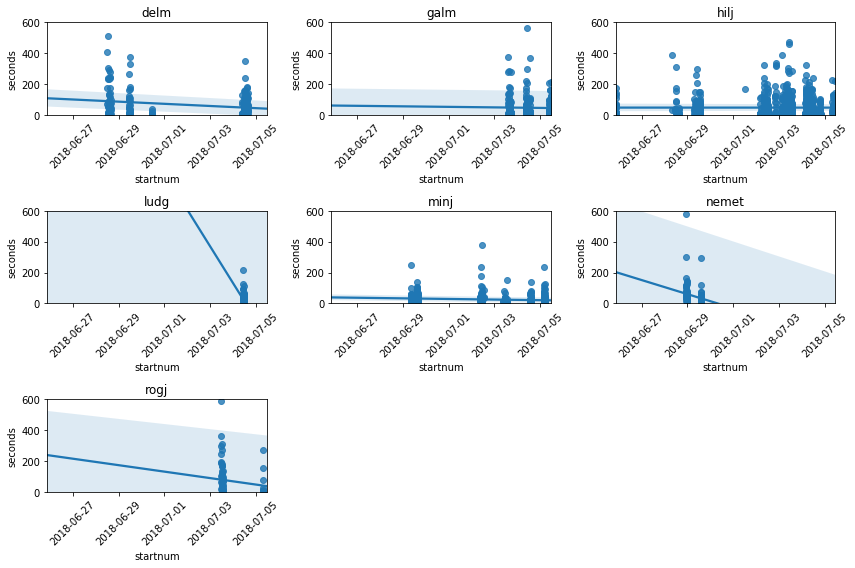

In [10]:
import seaborn as sns

@plt.FuncFormatter
def fake_dates(x, pos):
    """ Custom formater to turn floats into e.g., 2016-05-08"""
    return dates.num2date(x).strftime('%Y-%m-%d')

fig = plt.figure()
i=0
for name, group in dodf.groupby(['user__username']):
    print(name)
    i+=1
    ax = fig.add_subplot(3,3,i)
    ax.margins(x=0,tight=True)
    sns.regplot(x='startnum',y='seconds',data=group,ax=ax)
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    ax.set_ylim(0,600)
    ax.set_xlim(dodf['startnum'].min(),dodf['startnum'].max())
    #ax.margin(x=0)
    #break
    ax.xaxis.set_major_formatter(fake_dates)
    ax.set_title(name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
#plt.margins(x=0)
plt.tight_layout()
plt.show()